# Natural Language Processing with Deep Learning AE1

In [1]:
import nltk
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import treebank
from nltk.probability import FreqDist
from nltk.lm.models import MLE, Laplace
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk import MLEProbDist
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases
from matplotlib import pyplot as plt
import pylab
import re
import string
import itertools

## General Questions

#### 1. Give examples of Natural Language processing systems and describe the main functions of an NLP application.

Natural Language Processing is a field of computer science or computational linguistics that focuses the algorithmic manipulation of natural language via computers (Bird, Klien and Loper, 2009). Computers do not operate in natural language, instead computers use machine code to interpret instructions. Machine code is a binary numerical language, consisting of 1s and 0s. When we write computer programs we must use a high-level language such as Python or Java to write source code which can be compiled and translated to machine code. Similarly, natural language processing (NLP) works to interpret human language in a way that computers, who only operate in machine language, can comprehend. 
The aim of NLP is to manipulate natural language using high-level programming languages that can be understood by computers, so that human language can be more effectively intergrated into certain technologies and applications. 

NLP applications are commonplace today being used in search engines, all kinds of text analysis such as style or summarisations,as well as being vital in human-computer interaction.  Common NLP fields are question answering and information extraction, chatbots and dialogue systems, automatic speech recognition/text to speech and machine translation (Jurafsky and Martin, 2023). 

NLP allows us to automatically analyse or classify texts according to sentiment, topic etc, which can be useful for marketing purposes as well as gathering information. Furthermore, question answer and information extraction are important tasks that enable computers to retrieve information. Information extraction can be achieved through mining of web data or by performing a reading comprehension on raw texts. These algorithms are able to identify patterns and keywords in the data. A prominent benefactor of these systems are search engines which collect and rank documents in order to show the most relevant results to a natural language query (Jurafsky and Martin, 2023). However, question answering, especially long form question answering, is also incorporated into conversational agents (Jurafsky and Martin, 2023). 

Following from this, within the field of human-computer interaction NLP is commonly used in dialogue systems. This usually takes the form of task-based personal assistants, such as 'Siri' or 'Alexa', that can perform tasks via written or, more often, spoken language. There are numerous sub-applications of NLP concerning speech - text-to-speech software can be used by those who cannot speak themselves or wish to automatically generate a voice that is not their own, transcribing software can assist with human dictation and speech detection can be used to extract information from audio - to name a few examples. Chatbots are also a popular use of NLP. These chatbots are trained to be able to respond and generate relevant (and informed) natural language. These applications began using rule-based methods, eg. *ELIZA*, but the field is now dominated by neural networks and transformer based models, eg. *ChatGPT* (Jurafsky and Martin, 2023). 

Finally, machine translation involves using computers to translate one language to another, such as the methods used by popular applications like *Google Translate*. It is often used whilst browsing web data but also can be a helpful tool for human translators (Jurafsky and Martin, 2023). It most often functions by using an encoder-decoder network trained on already translated data in both languages, which is able to map an input sequence and its contextual information to an output sequence. These sequence-to-sequence based models excel at modelling the complex lingustical variations between the same sequence in two languages (Jurafsky and Martin, 2023). Machine translation can also be helpful in question answering as natural language queries can also be translated to a high-order logical representations and used to index a vast database of knowledge for knowledge retrieval (Jurafsky and Martin, 2023).

Overall NLP enables computers to interpret human natural language. Since, computers play a major role in our everyday lives, natural language processing systems are essential to operate freely in an increasingly technological world.


#### 2. What do we mean by ambiguity in natural language? Give examples of this and explain why this would cause problems in processing natural language.

In nearly all natural languages there is some level of ambiguity that can cause problems for NLP applications. Since we are working today with English, I will discuss ambiguity the English language. Ambiguity in English is often caused by homonyms. Homonyms come in two forms - homophones and homographs.  

Homophones are words that are pronounced the same but have different meanings (and often spellings also). Consider the following sentences: 

*   I put a **lead** on the dog.
*   He **lead** them astray.



*   Her favourite color is **blue**.
*   The wind **blew** it away.


Here, the words 'lead' and 'lead' as well as 'blue' and 'blew' have the same pronounciation but mean different things. Hearing the word alone is not enough to determine which meaning is meant. Whilst, sometimes the spelling of the word can differentiate the meaning as we can see with 'blue' and 'blew', usually the context is required for the meaning to be understood. This can create an issue for NLP speech recognition applications as more information other than the single word is needed to determine which word is being spoken. Hence, the application cannot approach the input one word at a time, it must consider series of words in order to interpret the context and attribute the appropriate meaning. 

Similarly, homographs are words that are spelt the same but have different meanings (and are often pronounced differently as well). An example of this is '**read**' (present tense) and '**read**' (past tense). These words often need pronounciations or contextual information from the whole sentence to be properly understood by machines or humans. NLP algorithms will struggle to distinguish these words from each other, as words with the same spelling will be considered the same 'word' if words are counted. For example, although word tagging can help mitigate this, a simple model that generates the next word in a sentence could generate the phrase 'a present this' because both 'a present' and 'present this' occur frequently together. However, the term in the first sentence refers to the noun *present* and the term in the verb *to present*, but both meanings are being 'lumped together' into one term. Hence, the resuling sentence is grammatically incorrect. 

Furthermore, certain words are both homophones and homographs. Consider:

*   **Go**!

Are they ordering someone to leave or cheering them on?

*   I made her **duck**.

Did she bend down to avoid an overhead object, eating water-fowl that has been prepared for her or some other meaning? 

These are full sentences, but even further context is required to determine their meaning. Further context can include the setting, previous sentences or even the tone or emotion of the speaker. Pronouns, emphasis, sarcasm, abbreviations, word variants and slang can provide further complexities that are problematic for computers. Humans are exeptionally good at understanding the complexities of natural language, although some still struggle - machines, however, can only understand natural language according to their given facilities. Capturing these complexities in a framework in a primary goal of NLP work.




## Coding exercises

For this assignment I have used the Tripadvisor Reviews 2023 dataset available to download on Kaggle here: https://www.kaggle.com/datasets/arnabchaki/tripadvisor-reviews-2023

In [3]:
# Uploads the selected file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving New_Delhi_reviews.csv to New_Delhi_reviews.csv


#### 3. Choose a natural language corpus from an open-source repository. Write a routine using Python and the NLTK library to ingest the dataset and perform the following functions:

*   Text normalisation
*   Tokenization of the sentences

Firstly, I ingest the Reviews dataset and remove the empty reviews. The Tripadvisor Reviews dataset contains thousands of natural language reviews, each with an attributed rating. The first 5 rows of the data are displayed below.

In [5]:
# Assigns the dataset filepath to the datafile variable
file = 'New_Delhi_reviews.csv'

# Loads the New_Delhi_reviews.csv dataset. 
reviews = pd.read_csv(file)
reviews = reviews.dropna()

reviews.head(5)

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


There are a variety of ways to normalise text, depending on the usage of your data. Normalisation tends to involve a combination of tokenization, sentence segmentation, case-standardisation, removal of stopwords ('a', 'the', 'of' etc.), removal of digits and stemming/lemmatization. In order to normalise my corpus of text data, I perform only two operations on the `review_full` column, followed by tokenization.

1. I normalise the case of the text, making all characters lower case. This is so that words like 'Totally' and 'totally' will be counted towards the same word.
2. I remove digits from the text. Whilst digits or numbers may be useful in some scenarios, they are not needed for my current task and can often be the result of typos or transcription errors.

I store the normalised text in a new column `review_normal` in order to preserve the original review. You can see this new column in the data displayed below. Further text normalisation procedures can include removing punctuation from the text. However, as I will be using the punctuation to perform sentence segmentation later on I have opted to have punctuation present.

In [6]:
# Text normalisation
reviews['review_normal'] = reviews['review_full'].str.lower().str.replace(r'\d+', '', regex=True)
reviews.head(5)

,rating_review,review_full,review_normal
0,5,"Totally in love with the Auro of the place, re...","totally in love with the auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...,i went this bar days regularly with my husban...
2,5,We were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea..."


I further create a new column `tokens` to store the list of tokens in each sentence using NLTK's word_tokenize function. An explanation of tokenisation can be found in the following question. 

In [7]:
# Creates a list of tokens from the review
reviews['tokens_full'] = reviews['review_full'].map(word_tokenize)
reviews['tokens_normal'] = reviews['review_normal'].map(word_tokenize)
reviews.head(5)

,rating_review,review_full,review_normal,tokens_full,tokens_normal
0,5,"Totally in love with the Auro of the place, re...","totally in love with the auro of the place, re...","[Totally, in, love, with, the, Auro, of, the, ...","[totally, in, love, with, the, auro, of, the, ..."
1,5,I went this bar 8 days regularly with my husba...,i went this bar days regularly with my husban...,"[I, went, this, bar, 8, days, regularly, with,...","[i, went, this, bar, days, regularly, with, my..."
2,5,We were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...,"[We, were, few, friends, and, was, a, birthday...","[we, were, few, friends, and, was, a, birthday..."
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market is the perfect place fo...,"[Fatjar, Cafe, and, Market, is, the, perfect, ...","[fatjar, cafe, and, market, is, the, perfect, ..."
4,5,"Hey Guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea...","[Hey, Guys, ,, if, you, are, craving, for, piz...","[hey, guys, ,, if, you, are, craving, for, piz..."


#### 4. Explain what is meant by the following, using examples from the language corpora you have chosen:
*   Tokenization of sentences
*   Lemmatization of sentences and words
*   Morphology
*   Stemming and affix removal of words





**Tokenization of sentences**

Sentence tokenization is a part of the text normalisation process, that seperates a sentence into a list of distinct tokens. A token is a distinct character or grouping of characters such as words, digits or symbols eg. punctuation. The set of tokens in a sentence makes up that sentences vocabulary. For example the sentence, "Hello, where's my hat? My hat has dissappeared!" can be seperated into 12 distinct tokens. Each word counts as a token, with hat only appearing in the list of tokens once despite appearing twice. The punctuation, ",", ".", "?" and "!" are also considered tokens. The contraction "where's" will be split into two tokens: "where" and "'s". Spaces, returns or new line characters are not included in the list of tokens.

Take the first sentence in our reviews dataset: 

`'Totally in love with the Auro of the place, really beautiful and quite fancy at the same time. The ambience is very pure and gives a sense of positivity throughout. Outdoor and indoor interior are quite quaint and cute. Love the open kitchen idea and there whole marketplace ideology. Due to coronovirus they specifically use disposable cutlery to keep the pandemic in mind taking all the precautionary measures from the beginning of the place with the mask on their staff and using good sanitisation. The food is really amazing specially the pizza straight from the oven and the hummus and pita bread are quite delicious too. If you're looking for a classy yet soothing Italian place in Delhi,Fatjar is a go to for you!'`

This can be tokenized as the following:

In [109]:
print(reviews['tokens_normal'][0])

['totally', 'in', 'love', 'with', 'the', 'auro', 'of', 'the', 'place', ',', 'really', 'beautiful', 'and', 'quite', 'fancy', 'at', 'the', 'same', 'time', '.', 'the', 'ambience', 'is', 'very', 'pure', 'and', 'gives', 'a', 'sense', 'of', 'positivity', 'throughout', '.', 'outdoor', 'and', 'indoor', 'interior', 'are', 'quite', 'quaint', 'and', 'cute', '.', 'love', 'the', 'open', 'kitchen', 'idea', 'and', 'there', 'whole', 'marketplace', 'ideology', '.', 'due', 'to', 'coronovirus', 'they', 'specifically', 'use', 'disposable', 'cutlery', 'to', 'keep', 'the', 'pandemic', 'in', 'mind', 'taking', 'all', 'the', 'precautionary', 'measures', 'from', 'the', 'beginning', 'of', 'the', 'place', 'with', 'the', 'mask', 'on', 'their', 'staff', 'and', 'using', 'good', 'sanitisation', '.', 'the', 'food', 'is', 'really', 'amazing', 'specially', 'the', 'pizza', 'straight', 'from', 'the', 'oven', 'and', 'the', 'hummus', 'and', 'pita', 'bread', 'are', 'quite', 'delicious', 'too', '.', 'if', 'you', "'re", 'looki

**Lemmatization**

A further way of normalising text data is through lemmatization. Lemmatization involves reducing words to their base etymological form as found in the dictionary. For example: 
*   'See', 'saw', 'seeing' would be lemmatised to 'see'
*   'Box', 'boxes', 'box's' would be lemmatised to 'box'
*   'Happier', 'happiest', 'happy' would be lemmatised to 'happy'


This allows for words that are derived from the same root to be considered the same word. Thus, 'see', 'saw' and 'seeing' would all be counted as instances of the same token 'see'. 

We can lemmatise tokens using the WordNetLemmatizer object from NLTK. The first review in the dataset is transformed into a list of lemmas below. 

In [ ]:
lemmatizer = WordNetLemmatizer()
lem_sent = [lemmatizer.lemmatize(words_sent) for words_sent in reviews['tokens_normal'][0]]
print(lem_sent)

We can see that 'gives' has been replaced with the root word 'give'and 'measures' has likewise been replaced with 'measure'.

In [ ]:
set(reviews.tokens_normal[0]) ^ set(lem_sent)

**Morphology**

According to Jurafsky and Martin (2023), "morphology is the study of the way words are built up from smaller meaning-bearing units called morphenes". In NLP the two types of morphenes are 'stems' and 'affixes'. An affix is the ending of the word, such as -ing, -ly, -s, -y. For example, the afix of the word 'beautiful' is 'ful', and the stem is 'beauti'. The stem proceeds the affix and is where you can find the general meaning of the word, whereas the affix denotes an attribute of that meaning. 

For example, 'walking' and 'walked' share the stem 'walk', but the affix 'ing' denotes walk in the present tense versus the affix 'ed' denotes walk in the past tense. The stem is not equivalent to the root word, however. Indeed, the stem is not intended to be a word at all (see 'beauti'), merely one part. 

**Stemming**

Stemming, on a similar vein to lemmatization, acts as a way of grouping words derived from the same word together. However, whilst lemmatization replaces the word with its etymological base, stemming follows a more simplistic approach by acting as a morphological parser and replacing the word with its stem (Jurafsky and Martin, 2023). 

We can perform stemming with the PorterStemmer object from NLTK (Bird, Klien and Loper, 2009). The first review in the dataset is transformed into a list of stems below. 



In [ ]:
ps = PorterStemmer()
ps_stem_sent = [ps.stem(words_sent) for words_sent in reviews['tokens_normal'][0]]
print(ps_stem_sent)

For example, 'totally' has been replaced by PorterStemmer with 'total' and 'beautiful' has become 'beauti' and so forth. If the word 'beauty' appears later in the text it can be grouped together with 'beautiful' as they share the same stem: 'beauti'. 

Porter Stemmer is only one example of a stemmer. Lancaster Stemmer and Snowball Stemmer are also available models with NLTK. Porter Stemmer is considered the most basic of the stemmers, whereas Snowball Stemmer is more agressive. Lancaster Stemmer is the most agressive and further allows for custom stemming rules to be defined (Heidenreich, 2018). 

#### 5. Describe a general method for the construction of an NLP algorithm.


The first step in constructing an NLP algorithm is data collection. In our case, we are downloading a dataset so the data has been collected by someone else. However, in many cases of NLP data can be mined from the internet or other sources, which would involve data collection processes such downloading the raw text, stripping any HTML markup and trimming it to capture the desired content (Bird, Klein and Loper, 2009). 

Following from this, one should perform feature extraction. For example, as we are not performing sentiment analysis on the Reviews dataset we do not have any need for the rating column, only the raw text from the review. This text can be normalised, cleaned and processes through a series of processing modules such as case-folding and cleaning the data, tokenization, PoS tagging, sentence segmentation and lemmatization/stemming depending on the task. This can be done via a processing pipeline. Next we must vectorize the data - this will present the reviews as a numerical vector that the machine learning algorithm is able to analyse. A model can then be trained on the vectorised data. These can often be constructed using pre-trained libraries such as NLTK.

Prior to the training stage, data is split into train, dev and test subsets. The training subset is used to train the algorithm, it is assigned X and y values corresponding to the inputs and labels which are both known to the algorithm. The data can be evaluated using the developement or evaluation set where the labels are with-held and used to evaluate accuracy, perplexity, F-score etc. During this evaluation stage, hyperparameter values should be optimised and model selection should occur based on the results. Finally, the data can be deployed to the test set which acts to emulate data encountered 'in the wild' upon model completion.  


#### 6. Describe how the use of classifiers can be used to segment sentences and language corpora.

Just how tokenization segments sentences into tokens, larger texts can be split into sentences using classifiers. Classifiers can be used to segment sentences using either a rule-based approach or with machine learning.

Below is a rudamentary rule-based approach that splits `reviews.review_normal[0]` into sentences based solely on the presence of full-stops, exclamation marks or question marks. 

In [110]:
re.split(r"[.|!|?]", reviews.review_full[0])

['Totally in love with the Auro of the place, really beautiful and quite fancy at the same time',
 ' The ambience is very pure and gives a sense of positivity throughout',
 ' Outdoor and indoor interior are quite quaint and cute',
 ' Love the open kitchen idea and there whole marketplace ideology',
 ' Due to coronovirus they specifically use disposable cutlery to keep the pandemic in mind taking all the precautionary measures from the beginning of the place with the mask on their staff and using good sanitisation',
 ' The food is really amazing specially the pizza straight from the oven and the hummus and pita bread are quite delicious too',
 " If you're looking for a classy yet soothing Italian place in Delhi,Fatjar is a go to for you",
 '']

Each token is parsed into the classifier, which determines if it is the end of the sentence or not. This method classifies this based on whether the token is .!, . or ?. This method would quickly fail when encountering abbreviations, numbering or speech. This could be improved slightly by mandating that a new sentence must require said punctuation and a capital letter proceeding it. This simple approach is designed to show how a rule-based approach functions, not to be a foolproof example. Certaintly, there are more sophisticated rule-based approaches that can segment sentences with relative success. However, rule-based approaches may sometimes not be flexible enough to capture all nuances in features; they also have to be manually coded and hence defining the necessary rules can be time consuming. 

Alternatively, supervised machine learning classifiers can be used. A machine learning classifier is able to learn the features of sentence segmentation without a programming having to manually provide the model with any rules. The model, instead, can learn from labelled examples of segmented sentences during training.

NLTK provides an example of training a Naive Bayes classifier to perform sentence segmentation. 

In [9]:
## Based on NLTK book examples: https://www.nltk.org/book/ch06.html

def features(tokens, i):
  return {'next-word-capitalized': tokens[i+1][0].isupper(),  
          'prev-word': tokens[i-1].lower(),                   
          'punct': tokens[i],                                 
          'prev-word-is-one-char': len(tokens[i-1]) == 1}     

The Treebank NLTK Corpus is used to train the classification model. Given a list of tokens and a set of indexes denoting the sentence boundaries within the list of tokens, we can use the previously defined function to create a feature set. The feature set is a list of dictionaries for each token that detail whether the next token is capitalised, whether the previous token is lower, the token itself, and whether the previous word is one character. It can then use the training data - the boolean values in the dictionary for each sentence-ending token - to recognise a pattern and learn how a sentence boundary is defined according to these features. Finally, we test this classifier on an unseen subset of the treebank corpus and evaluate its accuracy. The classifier performs reasonably well with 93.6% accuracy. 

In [10]:
# Sets up the treebank data
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0 

for sent in sents:
  tokens.extend(sent)
  offset += len(sent)
  boundaries.add(offset-1)

featuresets = [(features(tokens, i), (i in boundaries)) for i in range(1, len(tokens)-1) if tokens[i] in '.!?']
size = int(len(featuresets) * 0.1)

# Trains the classifier 
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Tests the classifier accuracy
nltk.classify.accuracy(classifier, test_set)

0.936026936026936

We can then use this classifier to classify un-labelled data, such as our Tripadvisor Reviews dataset. Given the tokenised reviews the classifier can classify each token into sentence-ending tokens and non sentence ending tokens based on the sentence structure in the Treebank corpus. 

In [11]:
def segment_sentences(words):
    start = 0
    sents = []
    for i, word in enumerate(words):
        if i < (len(words)-1) and word in '.?!' and classifier.classify(features(words, i)) == True:
            sents.append(words[start:i+1])
            start = i+1
    if start < len(words):
        sents.append(words[start:])
    return sents

I have split each tokenized review into a list of tokenized sentences, and added this to an extra column in the DataFrame. I have printed below, the first sentence of the first review, according to the Naive Bayes Classifier. 

In [12]:
reviews['sentences'] = reviews['tokens_full'].map(segment_sentences)
print(" ".join(reviews.sentences[0][0]))

Totally in love with the Auro of the place , really beautiful and quite fancy at the same time .


Classifers can also be used to perform sequence classification. Sequence classification involves adding Part of Speech (PoS) tagging to words or combinations of words in the sentence (Bird, Klien and Loper, 2009). The PoS tag acts as a descriptor and can help reduce ambiguity in natural language by labelling tokens or series of tokens as adjectives, nouns, conjunctions, etc. Similarly to sentence segmentation a classifier can be trained to identify and tag adjectives, which can be combined with another classifier that classifies nouns and so-forth, in order to classify all parts of the sentence. 

#### 7. Choose three different classifiers and describe the advantages and disadvantages of using them against different language corpora and in different circumstances.

**Decision Trees** 

Decision Tree Classifiers are a supervised classification algorithm that represents the data as a series of decision nodes (input features) and leaf nodes (labels). It then traverses the graph to make an informed classification. Decision trees are a simple, effective and understandable algorithm. Their flow-chart like structure is especially useful for hierarchical classifaction problems. 

For example:

```
       (mammals)        
       /               
     (has fur)      
      |     |             
  (meows)  (howls)
    |       |    |
  (cat)  (dog) (wolf)
```

However, decision trees can be ineffecient. They have the potential become exponentially large due to their recursive nature, and hence, suffer from both high time and space complexity. Decision trees may also struggle where features are indiscrete, or where features are weak predictors of the correct label (Bird, Klein and Loper, 2009). 

**Naive Bayes**

Naive Bayes is a probablistic, generative classifier. The algorithm models a data representation for each class in order to learn its defining features. When encountering new data, it attempts to determine which class is most likely to have generated the data and makes a classification based on the class with the highest attributed probability or 'votes' (Bird, Klein and Loper, 2009). It models probability based on Bayes' rule such that:

$P(Class|document) = \frac{P(document|Class)P(Class)}{P(document)}$

Naive Bayes also assumes that features are independ of each other - although this is not always the case! This can lead to over-counting and over-emphasis on certain features, especially with large datasets. Hence, logistic regression can be too simplistic to model real-life relations between data. Despite this, Naive Bayes still works well on smaller datasets, and is fast to train (Jurafsky and Martin, 2023); it works well on supervised binary classification, but can be extended to MultinomalNB for supervised multi-class problems.

**Logistic Regression** 

Logistic Regression is another probabalistic supervised classifier, however, whilst Naive Bayes is generative, logistic regression is discrimative. This means that logistic regression models how to distinguish between classes, it is primarily concerned with what a class is not - rather than its holistic features. Logistic Regression passes the feature representation through the sigmoid function to produce a normalised value, and then determines a probablistic threshold or decision boundary to differientiate between classes. For example, if P > 0.5 then the class is 1, elsewise the class is 0. 

Logistic Regression is superior to Naive Bayes in many ways, namely by being more robust to non-independent features, by assigning part of the weight to each correlated feature (Jurafsky and Martin, 2023). However, logistic regression is slower to train and use, and requires an optimisation step - usually using Stochastic Gradient Descent - to achieve accurate results. 




#### 8. Describe the concept of a processing pipeline.

In computer science, a processing pipeline is a series of data processes that perform in tandem, where the output of the previous process is the input for the next. Usually these processes are executed parallelly, before being fed into the rest of the model. For an NLP application the pipeline can usually be defined as:

*Text normalisation ⇒ Cleaned dataset ⇒ The rest of the model, e.g. Model training, Model testing and analysis* 

Think of a pipeline, like a assembly line in a factory or even a carwash - the raw data is inputted and traverses along a computational conveyorbelt until it is ready to be fed into the larger model. The first stage of this pipeline is the processing stage, before model training and evaluation. Text normalision often involves numerous processes depending on the task. These processes are formulated as modules that our data is parsed through, transformed and then moved onto the next module. An example of this pipeline could be:

*Tokenization ⇒ Sentence Segmentation ⇒ Case-Folding ⇒ Punctuation Removal ⇒ PoS Tagging, Stemming, Lemmatization ⇒ Vectorization * 

Finally, this cleaned data can be fed into the model.

#### 9. How would you use your language corpora to train a learning algorithm to perform natural language processing?

The Tripadvisor Reviews 2023 dataset contains reviews written in natural language and an associated rating. There are five classes of rating numbering from 0 (the most negative) to 5 (the most positive). An ideal use of this language corpora would be to train a Machine Learning algorithm to perform Sentiment Analysis. Sentiment anlysis is a NLP classification task in which a machine learning model is trained to classify reviews into a number of classes that correspond to sentiments.

After normalising the data, the data must be split into test and train sets (this can be done using Sckit-learn). The next step in this process would be to perform text vectorization on the reviews column using a vectorizer such as `CountVectorizer` or `TfidfVectorizer`. These vectorizers represent each review or sentence as a sparse vector of 1s and 0s depending on which tokens are present and how many times they occur. These can be used with variety of n_grams lengths. Count Vectorizer shows counts how many times each word type (or n-gram) occurs, whereas Tf-IDF displays its Tf-IDF score. The resulting 'Bag of Words' which is used to train a classifier, such as `MultinomialNB`. 

The machine learning classifier will be fitted to the training data, using the bag of words as the features and the ratings column of the dataset as the labels. The classifier can be used to predict the labels of the test data, and these predictions can be compared to the actual labels in order to calculate an accuracy score, as well as precision-recall. During model evaluation, different methods can be compared and contrasted tol achieve a optimal model. 

Since this dataset contains 5 classes, if we aim to use a binary classifier we will need to redefine the classes into 0 (negative) and 1 (positive). For example, reviews of rating 3, 4 and 5 could be reclassified as positive, and reviews of rating 0, 1 and 2 could be classified as negative. However, it is also possible to perform multi-class classification using multi class classification models such as `k-Nearest Neighbors` or Decision Trees, amongst others. 


#### 10. Use both Markov models and Bayesian classification to model the probabilities of words co-occurring in your language corpora.

Due to having only 12.7GB RAM available I have chosen to work only with a subset of the Tripadvisor Reviews 2023 data. 

In [13]:
# Used if you want to limit the size of the dataset
data = reviews.head(5000)

In order to model the probabilitieis of words co-occurring in this subset of the data, I create a co-occurance matrix manually. 

In [14]:
# Defines the vocabulary
vocabulary = set(data['tokens_normal'].sum())

I create the co-occurance matrix by looking at all of the bigrams in the data. The matrix shows the counts for how many times each unique token was followed by each unique token. For example the word 'cranberry' proceeded the word 'cranberry' zero times, as the bigram 'cranberry cranberry' does not appear in the data. 

In [12]:
# Creates an empty df with the vocabulary as the rows and columns
df = pd.DataFrame(0, columns=list(vocabulary), index=list(vocabulary))

# Counts co-occurances
for review in data["tokens_normal"]:
  for word1, word2 in itertools.pairwise(review):
    df[word1][word2] += 1

# Displays the df
df

,cranberry,kailash,kill,utkatsh,bug,touches,responsive,savanna,/excllent,hey,...,soy,hippy,gilt,lunch,cig,drool,opbject,mocktail,harissa,super-special
cranberry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kailash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
utkatsh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bug,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drool,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
opbject,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mocktail,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
harissa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can use the co-occurance matrix. We can calculate the probability of a token occuring in the corpus is:

$ P(A) = \frac{count(A)}{N} $

Where $N$ is the number of tokens.

To model the probability of co-occurance, where one token occurs after another, according to Bayes' conditional probability:

$ P(B|A) = \frac{P(B, A)}{P(A)} =\frac{count(A, B)}{count(A)} $

In [128]:
# Bayes probability 
def probability(x, y=None):
  if y==None:
    return df.loc[x].sum() / len(vocabulary)
  if x not in vocabulary or y not in vocabulary:
    return 0
  else:
    return (df[x][y] / df.loc[x].sum())

Hence the probability of 'we' and 'had' co-occuring is 18.6% - pretty likely! 

In [111]:
# Computes probabilty for 'we had'
probability('we', 'had')

0.18584703359542531

This can be further applied to finish sentences. To calculate the probability of the words in the sentence 'there was great service' co-occuring we apply the chain rule to Bayes conditional probability such that:

$ P(A, B, C) = P(A) * P(B|A) * P(C|A, B) $


So *P('totally, in, love) *becomes *P(totally)P(in|totally)P(love|totally, in)*. However, we can simplify this even further using the Markov model's assumption of independence. This assumes that the predicted word only depends on the prior n tokens and states that:

$ P(C|A, B) = Pbigram(C|B) $

Hence if we are only considering bigram probabilities *P(love|totally, in)* can be considered equivalent to *P(love|in)* and computed via the following:

In [131]:
probability('in','love')

0.00481500253421186

And the probability of the entire sentence co-occuring in the corpus can be calculated by:

In [132]:
probability('totally') * probability('totally', 'in') * probability('in', 'love') 

9.79853995566109e-07

We can also use this to classify the next word given one previous word, eg. 'great'. Our classifier can calculate the probability for each item in the vocabulary occuring after 'great' - then make a prediction based on the highest probability. In this case, this can be reduced to whichever item in the vocabulary follows 'great' the most frequently.  

In [133]:
# Classifies the next word
def predict_next(word1):
    return df[word1].idxmax()

predict_next("great")

'service'

#### 11. Illustrate the above exercise with calculations of probabilities for a range of n- grams of different lengths.


We can use NLTK's MLE (Maximum Likelihood Estimator) a probalistic language model to compute different n-gram probabilities for us. I will consider n-grams of both length 3 and 4.

In [15]:
# Formats the tokenized reviews as a list
tokens_split = data['tokens_normal'].values.tolist()

Below, I use MLE to create a trigram model. 

In [16]:
# 3-gram model
n = 3

# Provides the training data and vocab, adds <s> to indicate the start of a sentence to data as well as <UNK>.
train, vocab = padded_everygram_pipeline(n, tokens_split)

# Creates and trains MLE model
tri_model = MLE(n)
tri_model.fit(train, vocab)

print(tri_model.vocab)
print(tri_model.counts)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 14745 items>
<NgramCounter with 3 ngram orders and 1095498 ngrams>


In [134]:
# Prints the probabilities for different length n-grams
print(tri_model.score('with', ['love']))
print(tri_model.score('with', ['in', 'love']))
print(tri_model.score('with', ['totally', 'in', 'love']))

0.05341246290801187
0.9473684210526315
0


Naturally, at its maximum the trigram model can only the final word of trigrams. Hence, the value for `tri_model.score('with', ['totally', 'in', 'love'])` is 0. The four-gram model below is able to make classifications up to 4-grams, and so forth. However, notice that as the order of ngrams increases so does the number of total ngrams computed.

In [99]:
# 4-gram model
n = 4

train, vocab = padded_everygram_pipeline(n, tokens_split)
quad_model = MLE(n)
quad_model.fit(train, vocab)

print(quad_model.vocab)
print(quad_model.counts)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 14745 items>
<NgramCounter with 4 ngram orders and 1490664 ngrams>


In [75]:
# Prints the probabilities for different length n-grams
print(quad_model.score('with', ['love']))
print(quad_model.score('with', ['in', 'love']))
print(quad_model.score('with', ['totally', 'in', 'love']))

0.05341246290801187
0.9473684210526315
1.0


MLE can also be used to generate sentences based on probabilites. 

In [85]:
# Trigram model

" ".join(tri_model.generate(15))

'and you could sit outside and later many times and thus you have a chilled'

In [104]:
# 4-gram model

" ".join(quad_model.generate(15))

'available in good variety . good quality food . the hotel restaurant was exceptional ,'

#### 12. Use probability smoothing techniques to try and refine your results.



Notice how despite using the 4-gram model, the value of `quad_model.score('service', ['there', 'was', 'great'])` is 0. This is because the 4-gram 'there was great service' does not appear in the training corpus. 

In [136]:
print(quad_model.score('service', ['great']))
print(quad_model.score('service', ['was', 'great']))
print(quad_model.score('service', ['there', 'was', 'great']))

0.08987603305785125
0.005050505050505051
0


Laplace smoothing, is a probability smoothing technique that adds 1 to each count in the DataFrame. It helps the model deal with words that do not appear in the training corpus in order to stop probabilities from "zero-ing out". In the previous questions, we have used:

$ P(w_i) = \frac{count(w_i)}{N} $

Where $N$ is the number of tokens. However, with added Laplace smoothing, the probability of a word co-occuring becomes:

$ P(w_i) = \frac{count(w_i)+1}{N + |V|}$

Where $|V|$ is the size of the vocabularly. 

In [17]:
# Creates the MLE model with Laplace smoothing and prints the vocab and counts
train, vocab = padded_everygram_pipeline(n, tokens_split)
model = Laplace(1)
model.fit(train, vocab)
print(model.vocab)
print(model.counts)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 14745 items>
<NgramCounter with 3 ngram orders and 1095498 ngrams>


Then - whilst still categorised as very unlikely - the model makes a predictions for unseen sequences. 

In [138]:
print(model.score('service', ['great']))
print(model.score('service', ['was', 'great']))
print(model.score('love', ['there', 'was', 'great']))

0.01049097775912715
0.00013384193267750787
6.78195998643608e-05


#### 13. Use Zipf’s law to tune the size of the language corpora that generates the best set of probabilities and also optimises the processing run-time of your learning algorithm.

I have already reduced the size of my initial dataset to improve run-time and reduce the computational strain. We can further reduce the size of the language corpora using Zipf's law. 

According to Zipf's law the frequency of a token or word type is directly proportional to its rank in the corpus (Bird, 2009). There are few words that occur very frequently, whilst the majority appear sparingly - leading to a graph that appears to 'trail off'. Stopwords especially contribute to this, as well as punctuation when considering all tokens. Due to our task being word prediction, I have not removed either of these during text normalisation. 

I have plotted the rank v frequency for a language corpora of size 50, 500, 1000 and ~14000 (the previously used subset of the corpus). 

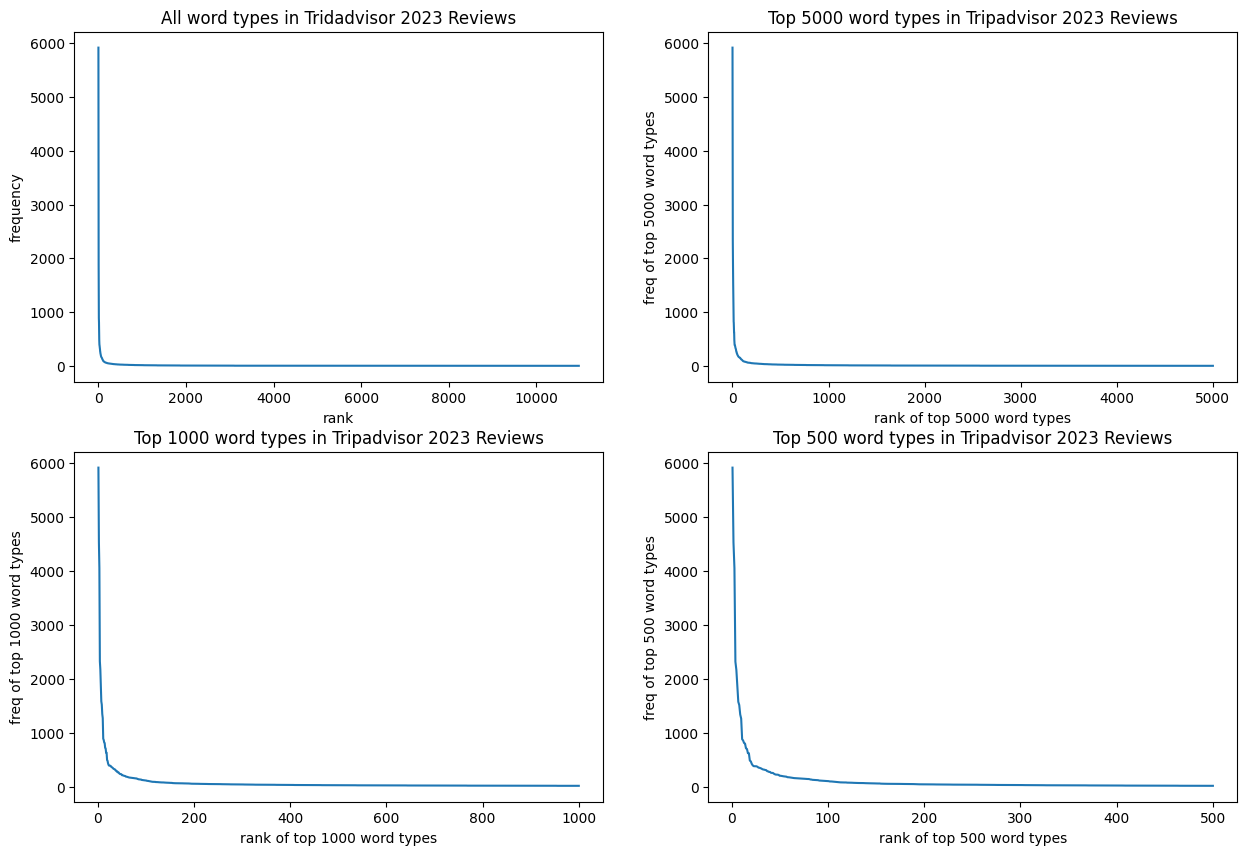

In [41]:
def make_plot(x, y, xlab, ylab, title, i, j):
    ax[i, j].plot(x,y)
    ax[i, j].set_xlabel(xlab)
    ax[i, j].set_ylabel(ylab)
    ax[i, j].set_title(title)

# Creates a frequency distribution of the tokens
md_fdist = FreqDist(tokens)

# Ranks all word types according to their frequency
freq = sorted(md_fdist.values(), reverse=True)
rank = range(1, len(freq) + 1)

# Top 50 Word types
top_500 = sorted(freq[:500], reverse=True)
rank_500 = range(1, len(top_500) + 1)

# Top 500 word types
top_1000 = sorted(freq[:1000], reverse=True)
rank_1000 = range(1, len(top_1000) + 1)

# Top 1000 word types
top_5000 = sorted(freq[:5000], reverse=True)
rank_5000 = range(1, len(top_5000) + 1)

#Plots rank versus frequency graphs
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

make_plot(rank, freq, "rank", "frequency", "All word types in Tridadvisor 2023 Reviews", 0, 0)
make_plot(rank_5000, top_5000, "rank of top 5000 word types", "freq of top 5000 word types", "Top 5000 word types in Tripadvisor 2023 Reviews", 0, 1)
make_plot(rank_1000, top_1000, "rank of top 1000 word types", "freq of top 1000 word types", "Top 1000 word types in Tripadvisor 2023 Reviews", 1, 0)
make_plot(rank_500, top_500, "rank of top 500 word types", "freq of top 500 word types", "Top 500 word types in Tripadvisor 2023 Reviews", 1, 1)

The full (~14000) corpus appears to be overuncumbered with tokens that are used very sparsely. We can see an improvement when reducing the corpus size significantly to 5000 unique tokens and 1000 unique tokens. When the corpus size is as low as 500 word types the results as less promising, this will not be able to generate optimal probabilites with such a small vocabulary. 

Hence, I create a new model using a corpus size of 5000. In the following section I will analyse the results of this model. 

In [67]:
def delete_words(words):
    return [w for w in words if w in common_words_set]

In [89]:
# Removes words rank 1000+ from list of tokens
common_words = md_fdist.most_common(1000)
common_words_set = set(w for w, _ in common_words)
small_tokens_df = reviews['review_normal'].map(word_tokenize).map(delete_words)
small_tokens_df = small_tokens_df[small_tokens_df.astype(bool)]

In [90]:
# Creates model based on reduced vocabulary
train, vocab = padded_everygram_pipeline(1, small_tokens_df)
small_model = Laplace(1)
small_model.fit(train, vocab)
print(small_model.vocab)
print(small_model.counts)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 726 items>
<NgramCounter with 1 ngram orders and 7347817 ngrams>


In [95]:
" ".join(small_model.generate(15))

'is through slow in - recently had offer hour an of many and is a'

#### 14. Qualify the performance of your experiments using measures of perplexity and the F-score for your classifiers.

In order to evalaute my classifier, I must test it ngrams generated from unseen data.

In [94]:
# Assigns the test data
test = reviews.tail(2000)
test_tokens = test['tokens_normal'].values.tolist()

We are able to evaluate our classifiers based on their F-score or perplexity. Perplexity is a measure of how well our language model 'understands' the text. It calculates how well our probability distibution generalises to the specified data. Perplexity can be defined as the inverse probability of the test set, normalised by the number of tokens (Jurafsky and Martin, 2023).

The perplexity scores for each model are printed below.

In [107]:
# Calculates perplexity for 4-gram model 
test, vocab = padded_everygram_pipeline(n, test_tokens)
print(quad_model.perplexity((list(e) for e in test)))

inf


In [106]:
# Calculates perplexity for 4-gram model with Laplace Smoothing
test, vocab = padded_everygram_pipeline(n, test_tokens)
print(model.perplexity((list(e) for e in test)))

14745.000000004913


In [108]:
# Calculates perplexity for 4-gram model with Laplace Smoothing with smaller corpus
test, vocab = padded_everygram_pipeline(n, test_tokens)
print(small_model.perplexity((list(e) for e in test)))

726.0000000002002


#### 15. Comment on the results you get from your experiments.

In sum, I have created and evaluated 3 n-gram language models to predict the next sentence - using a Naive Bayes classifier.  The first model calculates the probability of sequences up to 4 tokens long using MLE. The second adds Laplace Add-One smoothing to the model and the final model uses Zipf's Law to reduce the size of the language corpora to optimise the results whilst minimising space and time complexity. 

As each addition was added to the 4-gram model, the perplexity score decreased.A decreasing perplexity score usually indicates model improvements. The initial perplexity score for the original 4-gram model tended to infinity due to the lack of probability smoothing involved during model training - leading to the model 'zero-ing out' when confronted with unknown words or combinations (Jurasfsky and Martin, 2023). We can see that Laplace scoring significantly lowered the perplexity of the model. More sophisticated smoothing algorithms, such as Backoff and Interpolation can be implemented such as and may show further improvements (Jurasfsky and Martin, 2023). Finally, eliminating less frequent tokens helps reduce the sparsity of the dataset, lowering the perplexity even further and allowing the model to make more accurate next-word predicitions. However, further evaluation metrics beyond perplexity as well as more complex text normalisation techniques are still required to determine the best n-gram language model. 

## Advanced Methods

#### 16.  Alternative data structures and indexing, to assist with searching across possibilities (e.g., trees, subsidiary indexes)


We can store the n-grams in a tree of depth n, where each node represents a k-gram and each child node represents a continuing (k+1)-gram. 
Each node also contains the number of occurrences of the k-gram.
For example, two represent the three phrases `['hello my name', 'hello I am', 'the black cat']`, we can use this tree.
```
       (2,hello)        (1,the)
       /       \           |
     (1,my)  (1,I)     (1,black)
      |         |          |
  (1,name)    (1,am)    (1,cat)
```
Then supposing we want to predict the word following the bigram `hello my`, we can just index into the appropriate node, and see only the relevant trigrams (in this case `hello my name`) and their frequencies and feed this into our model.

Whilst in theory, the worst case time complexity is still $O(len(vocab))$, in practice we will drastically cut down on the average time complexity since the n-grams are sparse. 

#### 20. Analysis of the computational time and space complexity, and presentation of insight into the scaling properties of the NLP algorithms and processing pipelines; Understanding of the consequences of these properties on maximum corpora size

There are two aspects of the overall model, building the model and making predictions, and the time and space complexity can be measured for both respectively. I will focus on my manually coded model in question 10.

**Building the model**

The time complexity when building the model is linear with respect to the number of tokens. When counting the instances for each word type, the algorithm goes through the entire corpus, performing the same number of computations as there are ngrams to be counted. If we are counting unigrams then time complexity will be $O(n)$, where $n=len(tokens)$. For a sequence of tokens of $n$ length, there will be $n-1$ bigrams, $n-2$ trigrams, $n-3$ 4-grams etc. so for the overall time complexity will be $O(n-k-1)$ where k is the order of n-gram. So the time complexity is constant as $O(n-k-1)$ is of order $O(n)$ regardless of the order of n-gram. 

Space complexity, however, will increase in order each as the order of n-gram increases. The total number of unique bigrams in the worst case will be $n^2$, for trigrams $n^3$ and so forth. Hence, there will be more unique trigrams than unique bigrams, more unique bigrams than unigrams, meaning that we will have to store more data in memory. Thus, the space complexity is $O(n^k)$ where $k$ is the order of n-grams used. 

**Making predictions**

Making predictions, whilst a seperate process, follows a similar pattern. The time complexity is of linear order with respect to the vocabulary. This is because the algorithm indexes into the appropriate row for the prior token in $O(1)$ time. Then, iterates linearly through the row of the coocurance matrix in $O(n)$ time, where $n=len(vocabulary)$. So, overall time complexity of the predicting algorithm is $O(1*n)$, which is equivalent to $O(n)4.

Space complexity grows exponentially depending on the order of output n-gram. The space complexity for $O(n^2)$ predicting bigrams, $O(n^3)$ for predicting trigrams. The output n-gram refers to the total n-gram after making the prediction. For example, if we are predicting the next token after 'he' then this is bigram prediction. Overall, the space complexity is $O(n^k + n^{k+1})$ which can be reduced to $O(n^k)$.

**In sum**:

Time complexity: $O(2n) = O(n)$ where $n$ is the number of tokens. 

Space complexity: $O(n^k + n^{k+1}) = O(n^k)$ where $k$ is the order of the output n-gram.

The increase in space-complexity was the primary problem during this project, hence the reduction of the dataset to the first 10000 reviews, due to limited RAM - especially when considering higher order n-grams. Overall, the time complexity is relatively acceptable but considering NLP tasks are often conducted on language corpora with a very large amount of unique tokens/word types, reducing algorithmic complexity is essential. Using Zipf's law to replaced underused tokens with <UNK> is one way to optimise efficiency, however, using other classification algorithms, either traditional machine learning algorithms or neural networks can streamline the process significantly. Ideally, calcualtions should be performed in log space to reduce time complexity as well as help avoid underflow.

#### 21. Identification and description of natural language processing functions that are not implemented or supported in the computational model described in this technical report and coding exercise (e.g., semantic analysis, ontologies, more advanced methods for assessing probability mass distribution, more advanced word prediction methods)

Using Gensim it is possible to use the `Phrases` package to perform phrase detection on the corpus. This will attempt to group words that often co-occur as one token. One such example the phrase, 'state of the art' would be split into multiple tokens in a normal model, dismantling its meaning. With Gensim we can preserve these phrases and transform our sentences accordingly. 

In [207]:
# Phrase Detection

# Training algorithm on list of sentences
phrases = Phrases(tokens_split)
# Creating the phraser which will transform the sentences based on predictions
bigram = Phraser(phrases)
# Transforms sentences based on predicted phrases
sentences = list(bigram[tokens_split])
print(sentences[0])

['totally', 'in', 'love', 'with', 'the', 'auro', 'of', 'the', 'place', ',', 'really', 'beautiful', 'and', 'quite', 'fancy', 'at', 'the', 'same_time', '.', 'the', 'ambience', 'is', 'very', 'pure', 'and', 'gives', 'a', 'sense_of', 'positivity', 'throughout', '.', 'outdoor', 'and', 'indoor', 'interior', 'are', 'quite', 'quaint', 'and', 'cute', '.', 'love', 'the', 'open_kitchen', 'idea', 'and', 'there', 'whole', 'marketplace', 'ideology', '.', 'due_to', 'coronovirus', 'they', 'specifically', 'use', 'disposable', 'cutlery', 'to', 'keep', 'the', 'pandemic', 'in', 'mind', 'taking', 'all', 'the', 'precautionary', 'measures', 'from', 'the', 'beginning', 'of', 'the', 'place', 'with', 'the', 'mask', 'on', 'their', 'staff', 'and', 'using', 'good', 'sanitisation', '.', 'the', 'food', 'is', 'really', 'amazing', 'specially', 'the', 'pizza', 'straight', 'from', 'the', 'oven', 'and', 'the', 'hummus', 'and', 'pita_bread', 'are', 'quite', 'delicious', 'too', '.', 'if_you', "'re", 'looking_for', 'a', 'cla

We can then use this when we use Gensim to create custom word embeddings. Word2vec creates word embeddings based on whether a token is likely to occur near another token. Based of this data, the model can learn word similarity, by learning which words appear in similar contexts. 

In [208]:
# Creates skip-gram/Word2Vec model 
model = Word2Vec(sentences, 
                 min_count=2,   
                 vector_size=500,      
                 workers=2,     
                 window=5,      
                 epochs=30)       

For example, the word 'meal' appeared in similar contexts to 'evenng', 'meals' and others that can be seen below. Think of these words almost like synonyms, such that we could replace the word 'meal' in the sentence 'we had a great meal', and whilst the specific meaning will change, the general context stays the same. 

In [204]:
# Prints top tokens with highest similarity score to 'meal'
model.wv.most_similar("meal") 

[('evening', 0.6020373702049255),
 ('meals', 0.5939827561378479),
 ('dinner', 0.5783793330192566),
 ('dining_experience', 0.551912784576416),
 ('trip', 0.5515774488449097),
 ('lovely_evening', 0.5217169523239136),
 ('stay', 0.4787341356277466),
 ('experiences', 0.4755570590496063),
 ('journey', 0.46971261501312256),
 ('business_lunch', 0.4691057503223419)]

We are then able to use the encoded word vectors to imporve our word prediction model. 

## Reference List:

Bird, S. Klein, E. Loper, E. (2009). *Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit*. O’Reilly. Available online: https://www.nltk.org/book/



Jurasfy, D. Martin, J. H. (2023). *Speech and Language Processing, An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition*. Stanford University Press. Available online: https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf

NLTK Project. (2023). 'nltk.lm package' In *Documentation*. Available online: https://www.nltk.org/api/nltk.lm.html 